In [1]:
library(MASS)

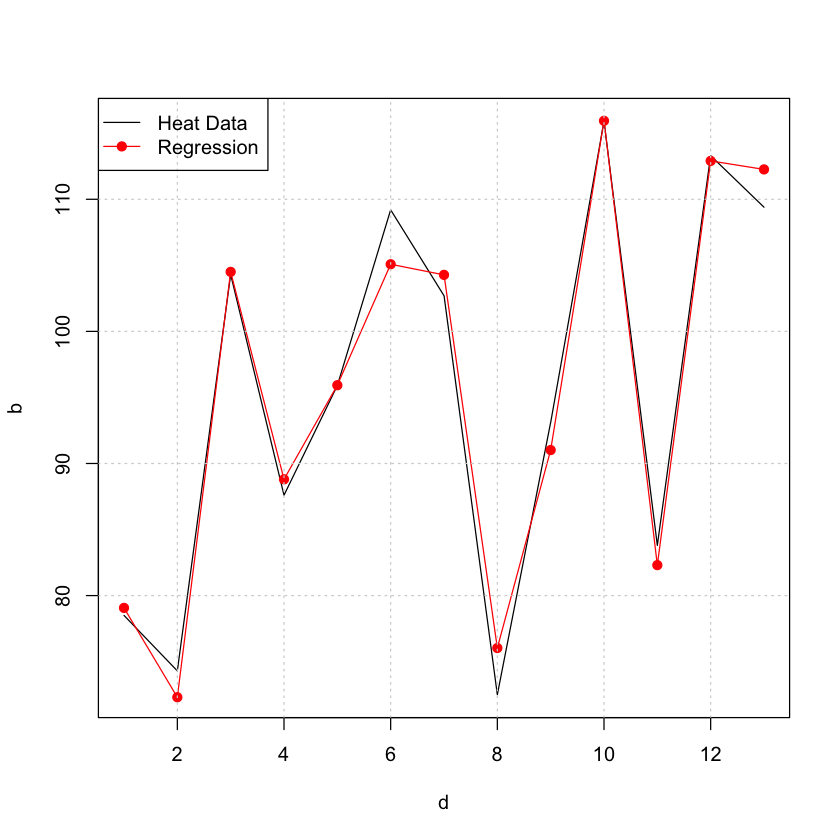

In [2]:
A <- read.csv("../DATA/hald_ingredients.csv", header = FALSE, sep = ",", dec = ".")
b <- read.csv("../DATA/hald_heat.csv", header = FALSE, sep = ",", dec = ".")

A <- data.matrix(A)
b <- data.matrix(b)

res <- svd(A)

S <- res$d
U <- res$u
V <- res$v

# after svd V which returned is not transponded. 
# In Python or Matlab svd returns V-transponded
# If we would like to be like Python or Matlab we have to do following:
#VT <- t(res$v)
# x = t(VT) %*% ginv(diag(S)) %*% t(U) %*% b

# Variante 1
x = V %*% ginv(diag(S)) %*% t(U) %*% b

# Variante 2
# x <- ginv(A) %*% b

d <- 1:length(b)



plot(d, b, col="black", lty = 1, type = "l")
lines(d,A%*%x,col="red")
points(d,A%*%x, pch = 19, col = "red")  ## only points
grid()
legend("topleft", legend=c("Heat Data", "Regression"), 
       col=c("black", "red"), lwd=1, lty=c(1,1), 
       pch=c(NA,19))
